## Data Mining & Advanced Analysis(MN 563) - Assignment 1

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data

data = pd.read_csv('Akura Soils Assay.csv')

In [ ]:
# Descriptive statistics and initial exploration
print(data.describe())
print("Dataset Shape:")
print(data.shape)
print()
print("First Few Rows:\n", data.head(5))
print()
print("\nSummary Statistics:\n", data.describe())
print()


           Be_ppm      Cs_ppm      Li_ppm      Nb_ppm        P_ppm  \
count  206.000000  206.000000  206.000000  206.000000   206.000000   
mean     1.740427    4.459660   26.546748    1.120204   334.543689   
std      0.916407    4.333599   68.485300    0.639403   360.737531   
min      0.005000    0.010000    0.020000    0.002000     2.000000   
25%      1.117250    1.695000   10.210000    0.737250   170.250000   
50%      1.595000    3.195000   16.270000    0.981500   240.500000   
75%      2.214500    6.052500   28.372500    1.310750   357.250000   
max      6.590000   33.140000  966.000000    6.289000  3651.000000   

           Rb_ppm      Sn_ppm      Ta_ppm      Th_ppm       U_ppm       Y_ppm  
count  206.000000  206.000000  114.000000  206.000000  206.000000  206.000000  
mean    57.562621    2.401650    0.008132    6.707233    1.787563   10.740578  
std     41.394873    1.281453    0.004588    2.839286    1.848189    7.431353  
min      0.005000    0.020000    0.005000    0.00

In [ ]:
# Checking for missing values
print("\nColumn Data Types:\n", data.info())
print()
print("\nMissing Values Percentage:\n" ,data.isna().mean() * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAMPLE  206 non-null    object 
 1   Be_ppm  206 non-null    float64
 2   Cs_ppm  206 non-null    float64
 3   Li_ppm  206 non-null    float64
 4   Nb_ppm  206 non-null    float64
 5   P_ppm   206 non-null    int64  
 6   Rb_ppm  206 non-null    float64
 7   Sn_ppm  206 non-null    float64
 8   Ta_ppm  114 non-null    float64
 9   Th_ppm  206 non-null    float64
 10  U_ppm   206 non-null    float64
 11  Y_ppm   206 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 19.4+ KB

Column Data Types:
 None


Missing Values Percentage:
 SAMPLE     0.000000
Be_ppm     0.000000
Cs_ppm     0.000000
Li_ppm     0.000000
Nb_ppm     0.000000
P_ppm      0.000000
Rb_ppm     0.000000
Sn_ppm     0.000000
Ta_ppm    44.660194
Th_ppm     0.000000
U_ppm      0.000000
Y_ppm      0.000000
dtype: float64


In [ ]:
# Converting column 5 from integer to float
data['P_ppm'] = data['P_ppm'].astype('float64')

# Confirming the change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAMPLE  206 non-null    object 
 1   Be_ppm  206 non-null    float64
 2   Cs_ppm  206 non-null    float64
 3   Li_ppm  206 non-null    float64
 4   Nb_ppm  206 non-null    float64
 5   P_ppm   206 non-null    float64
 6   Rb_ppm  206 non-null    float64
 7   Sn_ppm  206 non-null    float64
 8   Ta_ppm  114 non-null    float64
 9   Th_ppm  206 non-null    float64
 10  U_ppm   206 non-null    float64
 11  Y_ppm   206 non-null    float64
dtypes: float64(11), object(1)
memory usage: 19.4+ KB


In [14]:
# Handling missing values
# Filling missing values in 'Ta_ppm' with the mean of the column
data['Ta_ppm'] = data['Ta_ppm'].fillna(data['Ta_ppm'].mean())

# Confirming no missing values remain
print("\nMissing Values After Filling:\n", data.isnull().sum())



Missing Values After Filling:
 SAMPLE    0
Be_ppm    0
Cs_ppm    0
Li_ppm    0
Nb_ppm    0
P_ppm     0
Rb_ppm    0
Sn_ppm    0
Ta_ppm    0
Th_ppm    0
U_ppm     0
Y_ppm     0
dtype: int64


In [17]:
data = data.drop(columns=['SAMPLE'])

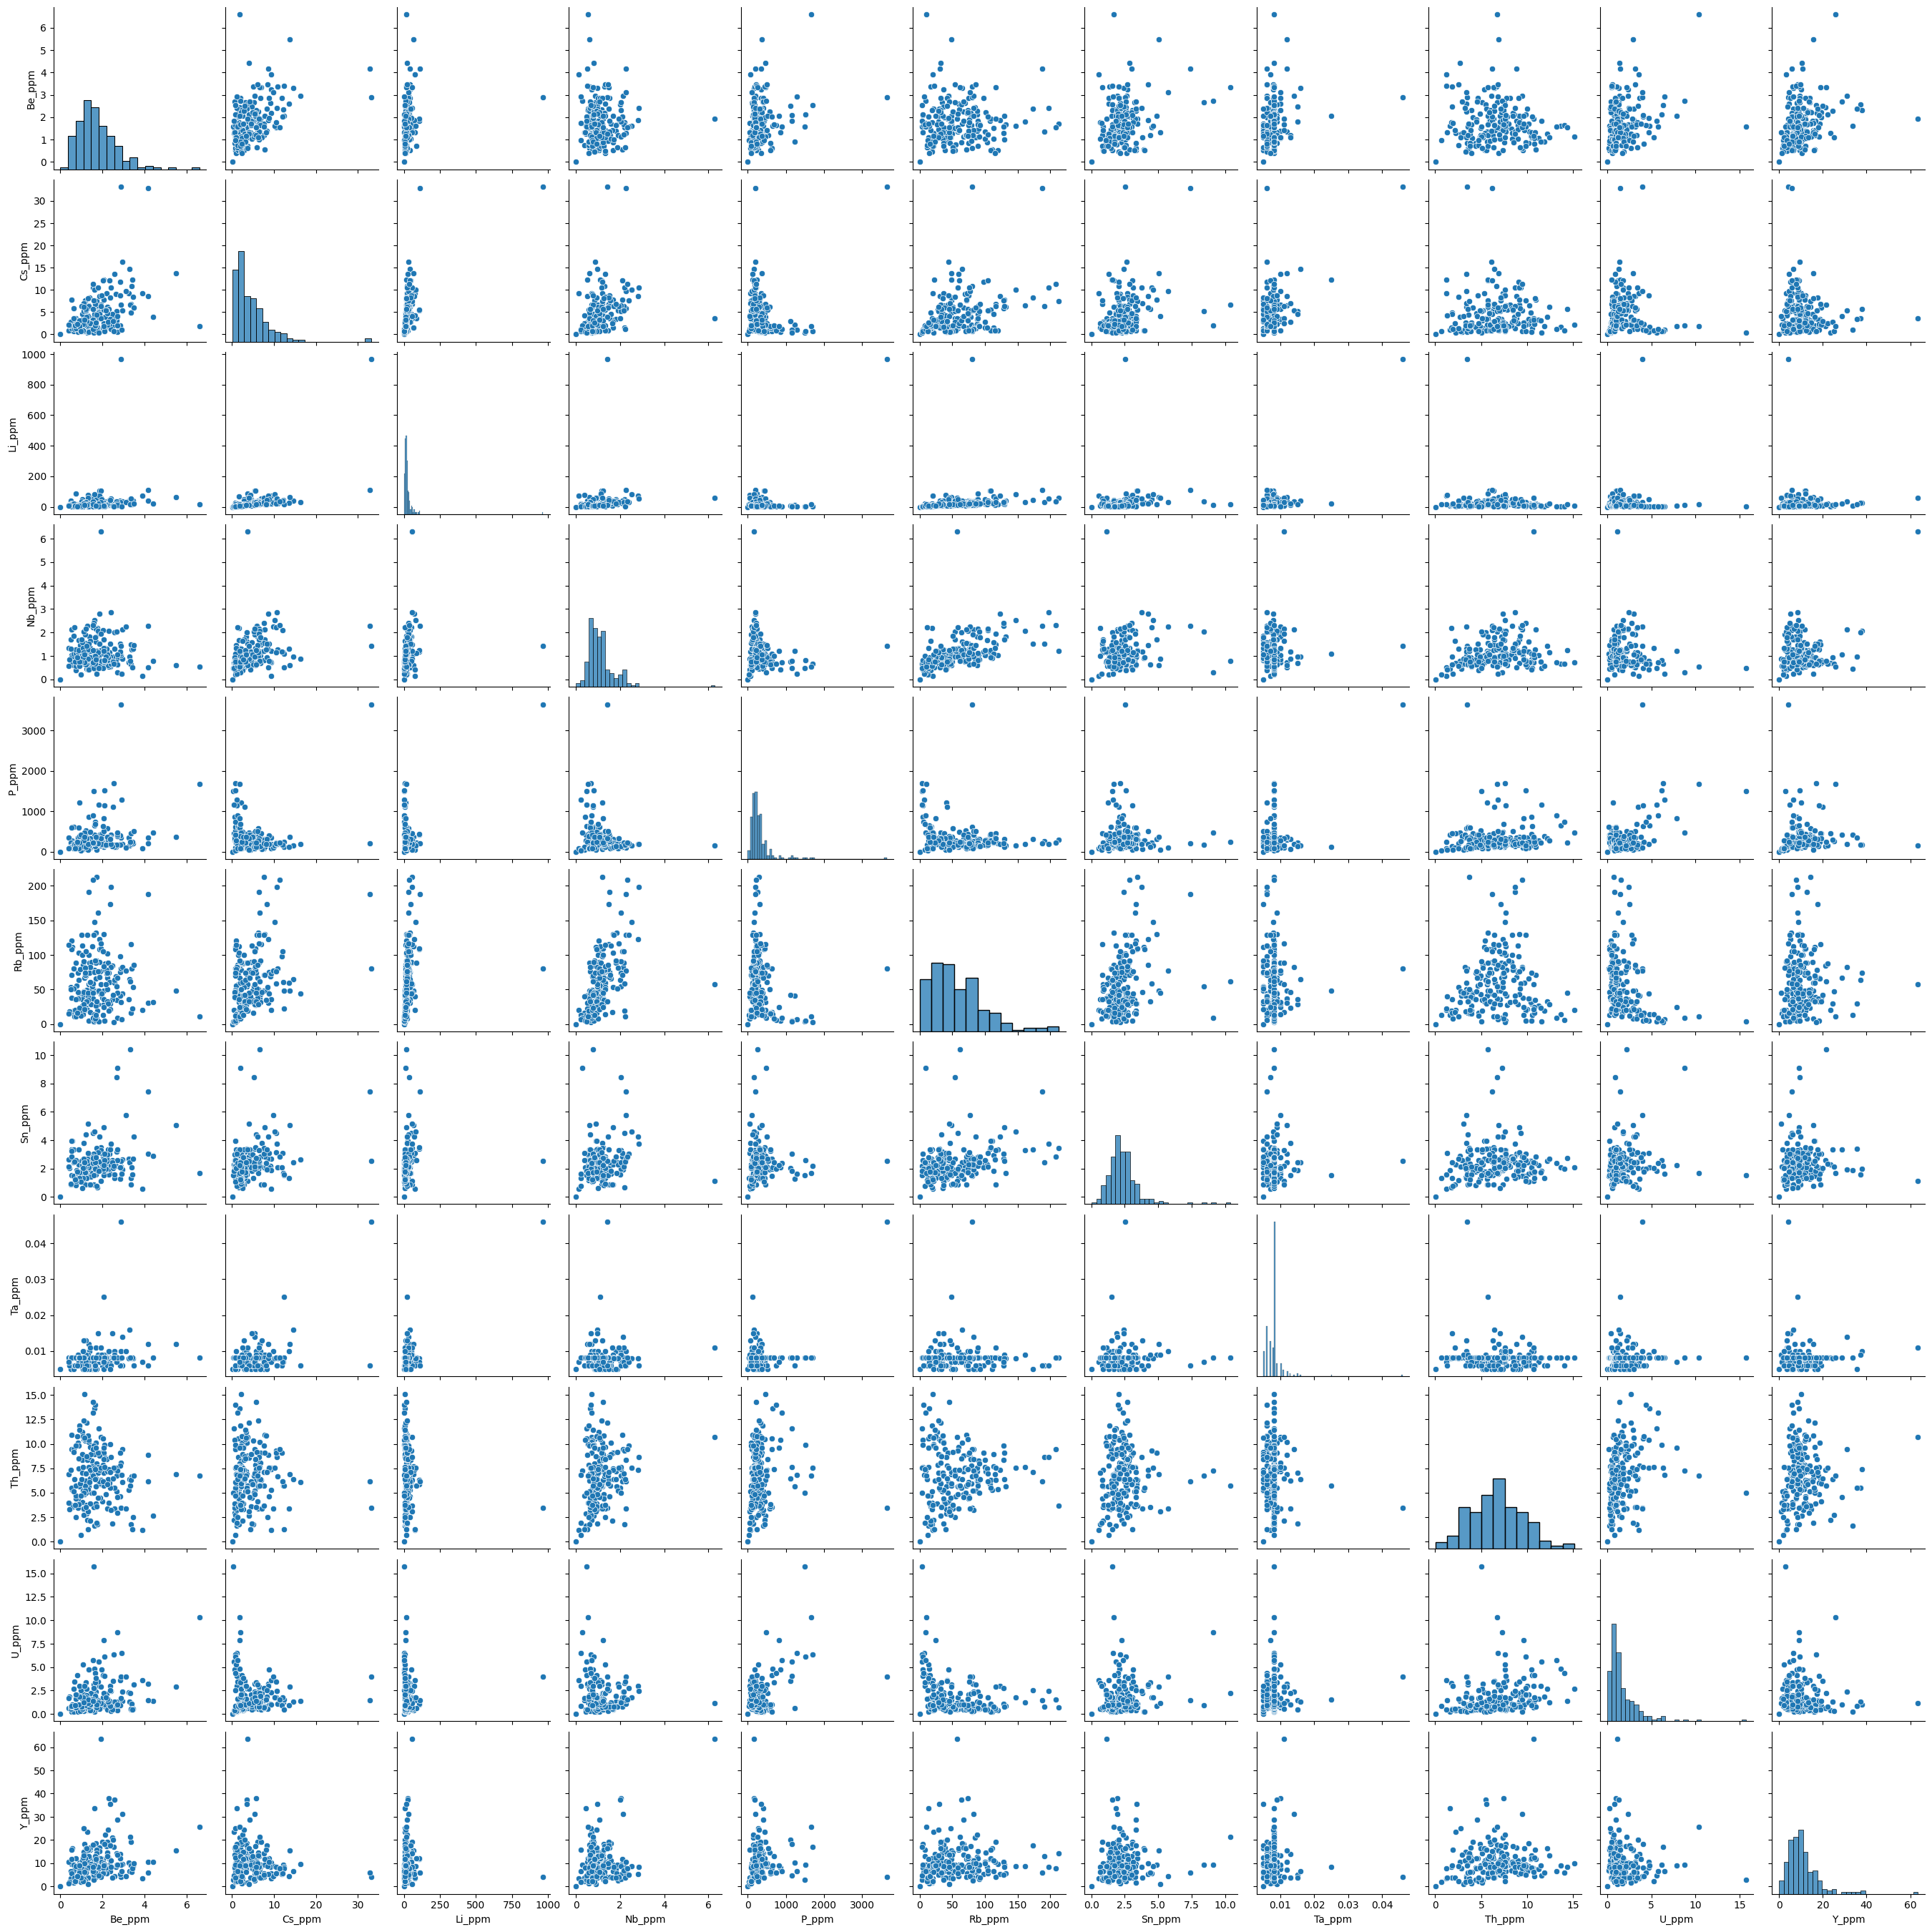

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)

In [ ]:
apply transformation 
